<a href="https://colab.research.google.com/github/deborammartins/Data_Analytics/blob/main/Regress%C3%A3o%2C_previs%C3%A3o_e_otimiza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Modelo de Regressão

## 1.1 Apresentação

## 1.2 Carregando os dados

[JSON Viewer](http://jsonviewer.stack.hu)

[Pandas: read_json](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html?highlight=read_json#pandas.read_json)


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dados = pd.read_json(
    path_or_buf = '/content/imoveis.json',
    orient = 'columns'
)


In [ ]:
dados.head()

,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
2,"{'customerID': '751522-JESYFEQL', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
3,"{'customerID': '714052-GAAEWYKS', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Comerci..."
4,"{'customerID': '568886-ZIBFOMCC', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."


### Explorar as informações

In [ ]:
dados.ident[0]

{'customerID': '775564-BOJSMVON', 'source': 'Website'}

In [ ]:
dados.listing[0]

{'types': {'unit': 'Outros', 'usage': 'Residencial'},
 'address': {'city': 'Rio de Janeiro',
  'location': {'lon': -43.413557, 'lat': -22.909429},
  'zone': 'Zona Oeste',
  'neighborhood': 'Taquara'},
 'prices': {'price': '45000', 'tax': {'iptu': '0', 'condo': '150'}},
 'features': {'bedrooms': 0,
  'bathrooms': 0,
  'suites': 0,
  'parkingSpaces': 1,
  'usableAreas': '62',
  'totalAreas': '62',
  'floors': 0,
  'unitsOnTheFloor': 0,
  'unitFloor': 0}}

## 1.3 Tratamento de dados inicial

### Normalização

In [ ]:
dados_lista1 = pd.json_normalize(dados.ident)
dados_lista2 = pd.json_normalize(dados.listing, sep='_')

In [ ]:
dados_lista1

,customerID,source
0,775564-BOJSMVON,Website
1,660895-AUENKNYY,Website
2,751522-JESYFEQL,Website
3,714052-GAAEWYKS,Website
4,568886-ZIBFOMCC,Website
...,...,...
73610,134148-MJIBCMDQ,Website
73611,541465-QBQVXXXZ,Website
73612,800542-BZREFTQS,Website
73613,939419-ECGUNTIH,Website


In [ ]:
dados_lista2

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0
3,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,346,468,0,1,0,0,32,32,0,0,3
4,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,3,2,1,1,60,0,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73610,Casa,Residencial,Rio de Janeiro,-43.388906,-23.003960,Zona Oeste,Barra da Tijuca,10000000,2900,2350,5,10,1,4,1024,1024,0,0,0
73611,Casa,Residencial,Rio de Janeiro,-43.395032,-23.000902,Zona Oeste,Barra da Tijuca,10000000,15000,3000,5,7,5,6,750,1250,0,0,0
73612,Apartamento,Residencial,Rio de Janeiro,-43.189682,-22.987018,Zona Sul,Copacabana,10000000,None,None,4,5,4,3,328,328,0,0,0
73613,Casa,Residencial,Rio de Janeiro,-43.351836,-23.005037,Zona Oeste,Barra da Tijuca,10000000,35000,2400,5,10,5,4,1024,1024,0,0,3


### Junção dos dataframes

In [ ]:
dados_imoveis = pd.concat([dados_lista1, dados_lista2], axis=1)

In [ ]:
dados_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73615 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                73615 non-null  object 
 1   source                    73615 non-null  object 
 2   types_unit                73615 non-null  object 
 3   types_usage               73615 non-null  object 
 4   address_city              73615 non-null  object 
 5   address_location_lon      73468 non-null  float64
 6   address_location_lat      73468 non-null  float64
 7   address_zone              73615 non-null  object 
 8   address_neighborhood      73615 non-null  object 
 9   prices_price              73615 non-null  object 
 10  prices_tax_iptu           64499 non-null  object 
 11  prices_tax_condo          67111 non-null  object 
 12  features_bedrooms         73615 non-null  int64  
 13  features_bathrooms        73615 non-null  int64  
 14  featur

In [ ]:
for coluna in dados_imoveis.columns:
  print('=======' *30)
  print(dados_imoveis[coluna].value_counts())

775564-BOJSMVON    1
917809-TRNXMOHE    1
125760-XEXDELYV    1
294183-VCUBOXCU    1
465524-CFDRZTHS    1
                  ..
200525-LDRZXCVM    1
938284-QWFBFUXB    1
882696-YVZSJYMI    1
566032-WFPGBXHL    1
610503-VULDJJZZ    1
Name: customerID, Length: 73615, dtype: int64
Website    73615
Name: source, dtype: int64
Apartamento    59106
Casa            9389
Outros          5120
Name: types_unit, dtype: int64
Residencial    69596
Comercial       4019
Name: types_usage, dtype: int64
Rio de Janeiro        73607
Queimados                 3
São Gonçalo               2
Cachoeirinha              1
São João de Meriti        1
Armação dos Búzios        1
Name: address_city, dtype: int64
-43.365895    399
-43.462590    278
-43.333066    236
-43.383834    232
-43.516473    218
             ... 
-43.231882      1
-43.236952      1
-43.240152      1
-43.185712      1
-43.250934      1
Name: address_location_lon, Length: 25753, dtype: int64
-23.000371    399
-23.017479    278
-22.937463    236
-2

## 1.4 Limpeza

### Filtro

In [ ]:
#Filtrando apenas os imóveis residenciais na cidade do Rio de Janeiro
filtro = (dados_imoveis['types_usage'] == 'Residencial') & (dados_imoveis['address_city'] == 'Rio de Janeiro')
dados_imoveis = dados_imoveis[filtro]

In [ ]:
dados_imoveis.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
5,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000,...,0,0,0,0,0,200,200,0,0,0


### Tipos de variáveis

In [ ]:
dados_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69588 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

Verificando a saída do `.info`

> 69588 entries, 0 to 73614

 Percebemos que temos que resentar o index, para que as infos fiquem ordenadas corretamente.
As variáveis de taxa e área estão tipo objeto. Precisamos converter para número.

In [ ]:
#Resetando o index de acordo com nosso filtro
dados_imoveis.reset_index(drop=True, inplace=True)

In [ ]:
#A função verbose nos traz apenas as informações gerais, sem discriminar cada variável
dados_imoveis.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Columns: 21 entries, customerID to features_unitFloor
dtypes: float64(2), int64(7), object(12)
memory usage: 11.1+ MB


Agora está correto.

In [ ]:
#Conversão de tipos
dados_imoveis = dados_imoveis.astype({
    'prices_price': 'float64',
    'prices_tax_iptu': 'float64',
    'prices_tax_condo': 'float64',
    'features_usableAreas': 'int64',
    'features_totalAreas': 'int64'
})

dados_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

## 1.5 - Tratamento de dados final

### Lidando com dados nulos

#### Dados nulos zone

In [ ]:
dados_imoveis.address_zone.value_counts()

Zona Oeste      35523
Zona Sul        18535
Zona Norte      14379
Zona Central     1002
                  149
Name: address_zone, dtype: int64

In [ ]:
dados_imoveis['address_zone'] = dados_imoveis['address_zone'].replace('', np.nan)

In [ ]:
dados_imoveis.address_zone.isnull().sum()

149

Vamos criar um dicionário que associe o bairro com as zonas. Assim, zonas sem preenchimento receberão o nome correspondente ao bairro que apresentam.

In [ ]:
#Criando o dicionário
dici = dados_imoveis[~dados_imoveis['address_zone'].isna()].drop_duplicates(subset=['address_neighborhood']).to_dict('records')
print(dici)

[{'customerID': '775564-BOJSMVON', 'source': 'Website', 'types_unit': 'Outros', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.413557, 'address_location_lat': -22.909429, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Taquara', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 150.0, 'features_bedrooms': 0, 'features_bathrooms': 0, 'features_suites': 0, 'features_parkingSpaces': 1, 'features_usableAreas': 62, 'features_totalAreas': 62, 'features_floors': 0, 'features_unitsOnTheFloor': 0, 'features_unitFloor': 0}, {'customerID': '660895-AUENKNYY', 'source': 'Website', 'types_unit': 'Apartamento', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.509141, 'address_location_lat': -22.869698, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Santíssimo', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 120.0, 'features_bedrooms': 2, 'features_bathrooms':

In [ ]:
#Relacionando bairro com zona
dic_zonas = {dic['address_neighborhood']: dic['address_zone'] for dic in dici}
print(dic_zonas)

{'Taquara': 'Zona Oeste', 'Santíssimo': 'Zona Oeste', 'Pedra de Guaratiba': 'Zona Oeste', 'Recreio dos Bandeirantes': 'Zona Oeste', 'Guaratiba': 'Zona Oeste', 'Jacarezinho': 'Zona Norte', 'Santa Cruz': 'Zona Oeste', 'Vargem Grande': 'Zona Oeste', 'Bangu': 'Zona Oeste', 'Tanque': 'Zona Oeste', 'Santo Cristo': 'Zona Central', 'Coelho Neto': 'Zona Norte', 'Bento Ribeiro': 'Zona Norte', 'Campo Grande': 'Zona Oeste', 'Oswaldo Cruz': 'Zona Norte', 'Camorim': 'Zona Oeste', 'Sepetiba': 'Zona Oeste', 'Vigário Geral': 'Zona Norte', 'Campinho': 'Zona Norte', 'Realengo': 'Zona Oeste', 'Jacarepaguá': 'Zona Oeste', 'Cidade de Deus': 'Zona Oeste', 'Honório Gurgel': 'Zona Norte', 'Centro': 'Zona Central', 'Cosmos': 'Zona Oeste', 'Tomás Coelho': 'Zona Norte', 'Cascadura': 'Zona Norte', 'Pavuna': 'Zona Norte', 'Paciência': 'Zona Oeste', 'Praça Seca': 'Zona Oeste', 'Vila Valqueire': 'Zona Oeste', 'Inhoaíba': 'Zona Oeste', 'Vicente de Carvalho': 'Zona Norte', 'Senador Vasconcelos': 'Zona Oeste', 'Turiaçu'

In [ ]:
#Atribuindo as zonas às linhas
for bairro, zona in dic_zonas.items():
  dados_imoveis.loc[dados_imoveis['address_neighborhood'] == bairro, 'address_zone'] = zona

Verificando se ainda temo valores faltantes:

In [ ]:
dados_imoveis['address_zone'].isnull().sum()

0

#### Dados nulos prices

In [ ]:
dados_imoveis['prices_tax_iptu'].isnull().sum()

8725

In [ ]:
dados_imoveis['prices_tax_condo'].isnull().sum()

6061

Vamos substituir esses valores por zero.

In [ ]:
dados_imoveis['prices_tax_iptu'].fillna(0, inplace=True)
dados_imoveis['prices_tax_condo'].fillna(0, inplace=True)

In [ ]:
print(f"Total de iptu nulos: {dados_imoveis['prices_tax_iptu'].isnull().sum()}")
print(f"Total de taxa de condomínio nulas: {dados_imoveis['prices_tax_condo'].isnull().sum()}")

Total de iptu nulos: 0
Total de taxa de condomínio nulas: 0


### Alterar o nome das colunas e seleção de variáveis

In [ ]:
dados_imoveis.drop(['customerID', 'source', 'types_usage', 'address_city',
                    'address_location_lon', 'address_location_lat', 'address_neighborhood'], axis=1, inplace=True)

In [ ]:
dicionario_colunas = {'types_unit': 'unit',
                      'address_zone': 'zone',
                      'prices_price': 'price',
                      'prices_tax_iptu':'tax_iptu',
                      'prices_tax_condo': 'tax_condo',
                      'features_bedrooms': 'bedrooms',
                      'features_bathrooms':'bathrooms',
                      'features_suites':'suites',
                      'features_parkingSpaces': 'parkingSpaces',
                      'features_usableAreas': 'usableAreas',
                      'features_totalAreas': 'totalAreas',
                      'features_floors': 'floors',
                      'features_unitsOnTheFloor': 'unitsOnTheFloor',
                      'features_unitFloor': 'unitFloor'}

In [ ]:
dados_imoveis = dados_imoveis.rename(dicionario_colunas, axis=1)
dados_imoveis.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0
2,Outros,Zona Oeste,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0
3,Apartamento,Zona Oeste,50000.0,120.0,400.0,3,2,1,1,60,0,3,4,2
4,Outros,Zona Oeste,50000.0,0.0,0.0,0,0,0,0,200,200,0,0,0


# Aula 2 - Regressão linear

## 2.1 - Correlação

*   Correlação: grau da relação entre variáveis. Pode ser positiva ou negativa essa relação.

*   Multicolinearidade: relação perfeita ou exata entre variáveis.



**Dica de leitura:** [Estatística prática para cientistas de dados: 50 conceitos essenciais](https://www.amazon.com.br/Estat%C3%ADstica-Pr%C3%A1tica-Para-Cientistas-Dados/dp/855080603X/ref=sr_1_21?__mk_pt_BR=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=1JJ44C5LJXLR3&keywords=data+science&qid=1657892785&sprefix=data+science%2Caps%2C201&sr=8-21)
e [Estatística: O que é, para que serve e como funciona](https://www.amazon.com.br/Estat%C3%ADstica-para-serve-como-funciona/dp/8537815128/ref=pd_sbs_sccl_3_1/137-9319794-7502061?pd_rd_w=EQoo7&content-id=amzn1.sym.d27ac626-cb3c-4c30-830f-0fd405f2510f&pf_rd_p=d27ac626-cb3c-4c30-830f-0fd405f2510f&pf_rd_r=E896BYW6W206YVVR3SHA&pd_rd_wg=3O0Cg&pd_rd_r=3e3910b0-5f34-4a57-87b2-1d918494d614&pd_rd_i=8537815128&psc=1) [(Naked Statistics: Stripping the Dread from the Data - versão em inglês)](https://www.amazon.com.br/Naked-Statistics-Stripping-Dread-Data/dp/039334777X/ref=sr_1_2?keywords=naked+statistics&qid=1657893464&sprefix=naked+st%2Caps%2C267&sr=8-2&ufe=app_do%3Aamzn1.fos.6a09f7ec-d911-4889-ad70-de8dd83c8a74)

In [ ]:
correlacao = dados_imoveis.corr()
correlacao

<ipython-input-81-985ba1b78828>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dados_imoveis.corr()


,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
price,1.000000,0.029751,0.047704,0.530474,0.571725,0.588738,0.423186,0.692502,-0.000619,-0.061910,-0.133700,-0.000143
tax_iptu,0.029751,1.000000,0.226213,0.013625,0.015086,0.019101,0.009720,0.014654,-0.000164,0.006704,0.005044,0.001204
tax_condo,0.047704,0.226213,1.000000,0.018460,0.020009,0.023479,0.018010,0.019712,-0.000313,0.013821,-0.000528,0.003072
bedrooms,0.530474,0.013625,0.018460,1.000000,0.665958,0.600596,0.467391,0.563545,-0.000532,-0.082025,-0.130611,-0.007146
bathrooms,0.571725,0.015086,0.020009,0.665958,1.000000,0.752495,0.487624,0.597793,0.000041,-0.044552,-0.107347,0.007599
suites,0.588738,0.019101,0.023479,0.600596,0.752495,1.000000,0.484850,0.577344,0.003971,-0.047576,-0.091408,0.005300
parkingSpaces,0.423186,0.009720,0.018010,0.467391,0.487624,0.484850,1.000000,0.483709,-0.000062,-0.048310,-0.074348,0.003788
usableAreas,0.692502,0.014654,0.019712,0.563545,0.597793,0.577344,0.483709,1.000000,-0.000214,-0.103729,-0.144041,-0.012715
totalAreas,-0.000619,-0.000164,-0.000313,-0.000532,0.000041,0.003971,-0.000062,-0.000214,1.000000,0.014677,0.003975,0.002329
floors,-0.061910,0.006704,0.013821,-0.082025,-0.044552,-0.047576,-0.048310,-0.103729,0.014677,1.000000,0.737802,0.121067


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Para mais detalhes consultar [Documentação Seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

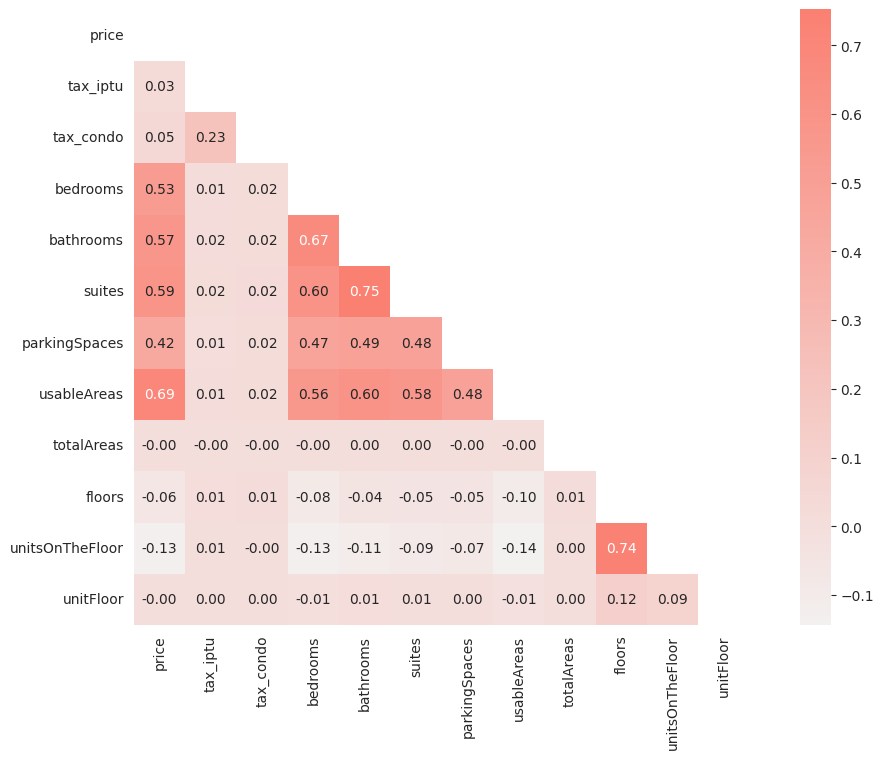

In [ ]:
#Criando o mapa de calor
cores = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = plt.subplots(figsize=(13,8))
  ax = sns.heatmap(correlacao, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)

Análise da distribuição da variável resposta.

Text(0.5, 0, 'Preço')

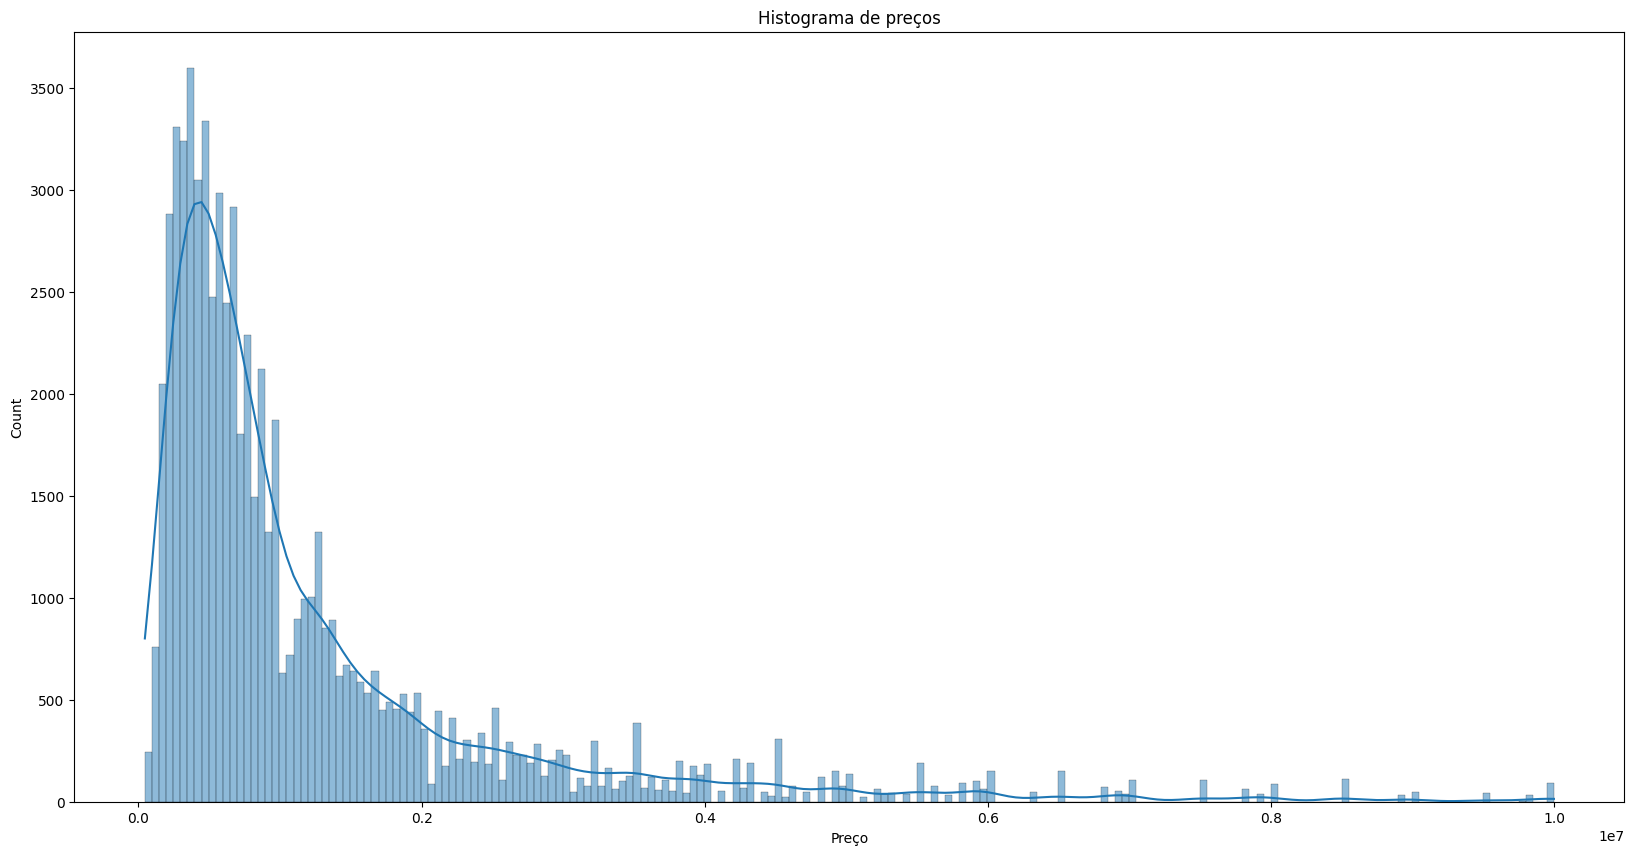

In [ ]:
ax = sns.histplot(data=dados_imoveis, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de preços')
ax.set_xlabel('Preço')

Como temos a maioria dos imóveis com valores baixos e poucos com valores altos, o modelo não terá dados o suficiente para conseguir predizer quando o valor for alto.

### Transformação das variáveis

Estamos realizando uma transformação logarítmica das variáveis para obtermos uma distribuição simétrica (mais próxima da normal), para que possamos usar o modelo de regressão linear. A transformação realizada é:


$$log1p = log(1+x)$$


Lembrar de realizar a transformação inversa para obter o valor original:


$$expm1 = exp(x) - 1$$




* Para mais detalhes consultar as documentações [`log1p`](https://numpy.org/doc/stable/reference/generated/numpy.log1p.html), [`expm1`](https://numpy.org/doc/stable/reference/generated/numpy.expm1.html#numpy.expm1) e [`FunctionTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html#sklearn.preprocessing.FunctionTransformer)



In [ ]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)
dados_transformados = transformer.transform(dados_imoveis.select_dtypes(exclude=['object']))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [ ]:
coluna_dados_transformados = dados_imoveis.select_dtypes(exclude=['object']).columns
df_transformado = pd.concat([dados_imoveis.select_dtypes(include=['object']), pd.DataFrame(dados_transformados, columns=coluna_dados_transformados)])
df_transformado.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Apartamento,Zona Oeste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Outros,Zona Oeste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apartamento,Zona Oeste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Outros,Zona Oeste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-87-662f7173ec6a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao_transformado = df_transformado.corr()


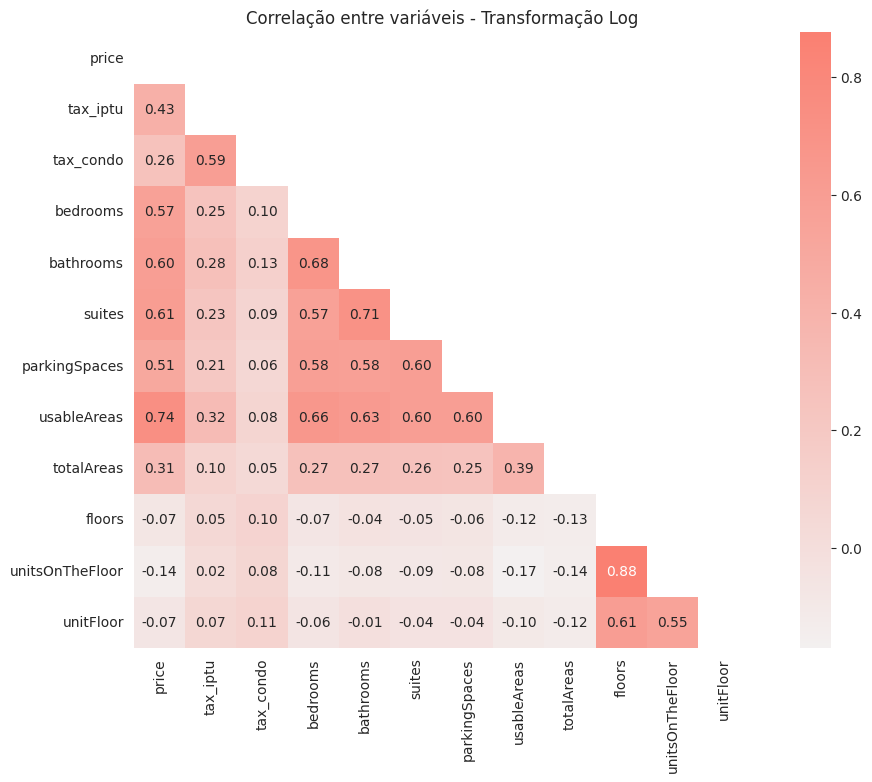

In [ ]:
#Criando o mapa de calor
correlacao_transformado = df_transformado.corr()
mask = np.zeros_like(correlacao_transformado)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = plt.subplots(figsize=(13,8))
  ax = sns.heatmap(correlacao_transformado, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)
  ax.set_title('Correlação entre variáveis - Transformação Log')

Text(0.5, 0, 'Preço')

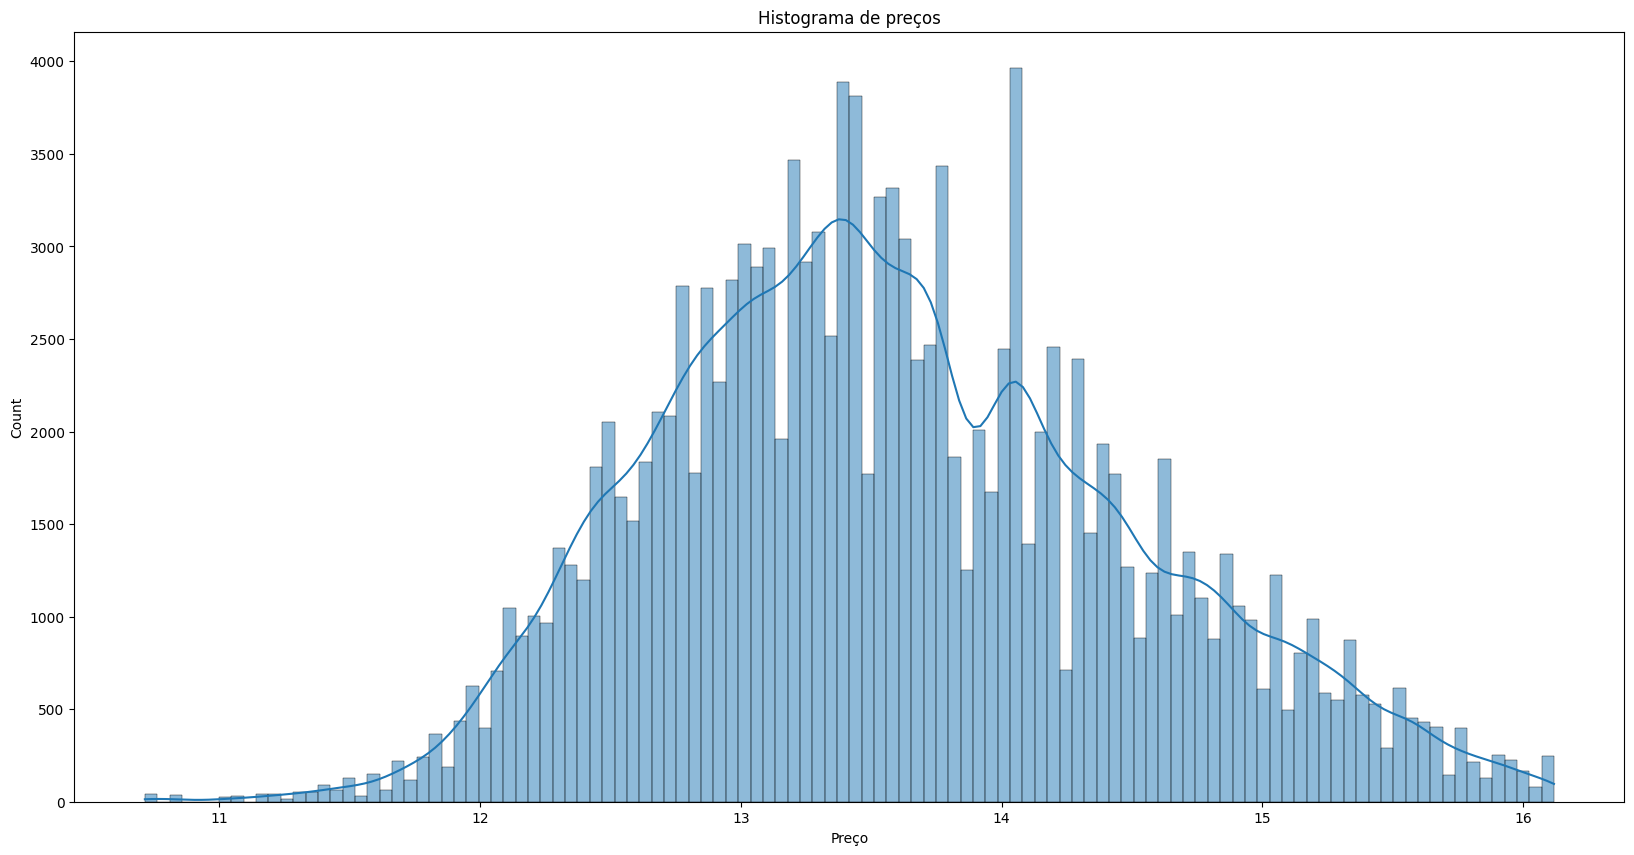

In [ ]:
ax = sns.histplot(data=df_transformado, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de preços')
ax.set_xlabel('Preço')

### Dummies

In [ ]:
variaveis_categoricas = df_transformado.select_dtypes(include=['object']).columns

In [ ]:
variaveis_categoricas

Index(['unit', 'zone'], dtype='object')

In [ ]:
df_dummies = pd.get_dummies(df_transformado[variaveis_categoricas])
df_dummies.head()

,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,0,0,1,0,0,1,0
1,1,0,0,0,0,1,0
2,0,0,1,0,0,1,0
3,1,0,0,0,0,1,0
4,0,0,1,0,0,1,0


In [ ]:
dados_imoveis_dummies = pd.concat([df_transformado.drop(variaveis_categoricas, axis=1), df_dummies], axis=1) #juntando os dois conjuntos pelas colunas (axis = 1)
dados_imoveis_dummies.head()

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,1,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,1,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,1,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,1,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,1,0


## 2.2 - Regressão Linear

* "A análise de regressão diz respeito ao estudo da dependência de uma variável, a variável dependente, em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio (da população) da primeira em termos dos valores conhecidos ou fixados (em amostragens repetidas) das segundas."

* [Documentação Sklearn - LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

* Regressão Simples: a variável dependente (regressando ou `y`) se relaciona a uma única variável explanatória (regressor ou `X`).

* Regressão Múltipla: a variável dependente (regressando ou `y`) se relaciona a mais de uma única variável explanatória (regressor ou `Xi`).


[slides]

## 2.3 - Ajuste e Previsão

### Divisão dos dados

In [ ]:
#Variáveis explicativas
X = dados_imoveis_dummies.drop('price', axis=1)

#Variável dependente
y = dados_imoveis_dummies['price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Divisão em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

### Modelo

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
#Treino
lr.fit(X_train, y_train)

ValueError: ignored

In [ ]:
#Teste
previsao_lr = lr.predict(X_test)

ValueError: ignored

In [ ]:
#Transformação inversa dos valores (exponencial)
np.expm1()

## 2.4 - Métrica de desempenho

### Coeficiente de Determinação

* descobrir quão “bem” uma linha de regressão amostral é adequada aos dados
* r2 situa-se entre 0 e 1
* "r2 mede a proporção ou percentual da variação total de Y explicada pelo modelo de regressão."





In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_lr = r2_score(y_test, previsao_lr)

### Extra

* [Documentação Sklearn - Métricas para Regressão](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

* Observação: Estas métricas dependem da escala dos dados!!!

* MSE (Mean Squared Error ou Erro Quadrático Médio): média da diferença **elevada ao quadrado** entre o valor real e o previsto. *(penalidade sobre o erro)*

* MAE (Mean Absolute Error ou Erro Absoluto Médio): média da diferença **absoluta** (módulo) entre o valor real e o previsto.


# Aula 3 - Árvore de Decisão para Regressão






## 3.1 - Árvore de Decisão Classificação versus Regressão

[slides]

[Biblioteca Sklearn - Desicion Tree](https://scikit-learn.org/stable/modules/tree.html#regression)

**Dica de leitura**: [Capítulo 6 - Mãos à obra: aprendizado de máquina com Scikit-Learn, Keras & TensorFlow: Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes](https://www.amazon.com.br/M%C3%A3os-obra-aprendizado-Scikit-Learn-inteligentes/dp/8550815489/ref=sr_1_2?keywords=machine+learning&qid=1658181249&sprefix=machine%2Caps%2C469&sr=8-2&ufe=app_do%3Aamzn1.fos.6d798eae-cadf-45de-946a-f477d47705b9), [Para saber mais: como funciona a árvore de decisão? - Classificação](https://cursos.alura.com.br/course/machine-learning-classificacao-tras-panos/task/107966)



## 3.2 - Implementando o Modelo


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Instanciando o modelo
dtr = DecisionTreeRegressor(random_state=42, max_depth=5) #max_depth é o limite de profundidade/crescimento

In [ ]:
#Treinando
dtr.fit(X_train, y_train)

In [ ]:
#Testando
previsao_dtr = dtr.predict(X_test)

**Gráfico de erro de predição**: Um gráfico de erros de predição mostra os alvos reais em relação aos valores previstos. Em um modelo perfeito, esses pontos estariam alinhados em 45 grau.


Para saber mais sobre outras visualizações:
[**Documentação YellowBrick**](https://www.scikit-yb.org/en/latest/)



In [ ]:
#Visualização de ajuste dos dados

from yellowbrick.regressor import PredictionError

ax = plt.subplots(figsize=(10,10))
pev = PredictionError(dtr)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

## 3.3 - Métrica

In [ ]:
r2_dtr = r2_score(y_test, previsao_dtr)

# Aula 4 - Random Forest para Regressão


## 4.1 - Modelo Ensemble

[slides]

[Biblioteca Sklearn - Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)

**Dica de leitura**: [Artigo Científico - Random Forests](https://link.springer.com/article/10.1023/A:1010933404324), [Wikipédia: Random Forests](https://en.wikipedia.org/wiki/Random_forest#:~:text=Random%20forests%20or%20random%20decision,class%20selected%20by%20most%20trees.), [Capítulo 4 - Livro Introduction to Statistical and Machine Learning Methods for Data Science](https://www.amazon.com.br/dp/B09C2DVZHR/ref=dp-kindle-redirect?_encoding=UTF8&btkr=1), [Capítulo 7 - Mãos à obra: aprendizado de máquina com Scikit-Learn, Keras & TensorFlow: Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes](https://www.amazon.com.br/M%C3%A3os-obra-aprendizado-Scikit-Learn-inteligentes/dp/8550815489/ref=sr_1_2?keywords=machine+learning&qid=1658181249&sprefix=machine%2Caps%2C469&sr=8-2&ufe=app_do%3Aamzn1.fos.6d798eae-cadf-45de-946a-f477d47705b9)

## 4.2 - Previsão

**Ponto de Atenção**
Os parâmetros são praticamente os mesmos entre o `DecisionTreeRegressor()` e o `RandomForestRegressor()`, com exceção de:

* `n_estimators`: quantidade de árvores na floresta
* `bootstrap`: define se será utilizado o método estatístico de amostragem *bootstrap*
* `oob_score`: define se será utilizado o método de amostragem *out-of-bag* para mensurar os erros da predição
* `n_jobs`: número de *jobs* rodando paralelamente (computação paralela - processadores)
* `warm_start`: faz a adequação de uma nova floresta ou usa uma floresta existente.
* `max_samples`: para o caso do `bootstrap` ser `True`, define o número de amostras a serem extraídas de X para treinar cada árvore base.


OBS: Caso não fosse definido um valor para o max_depth, a árvore criada seria expandida até que cada nó fosse puro. Isso significa dizer que a árvore seria expandida até que todos o dados presentes no nó pertencessem a uma única classe ou ainda até que a quantidade de amostras presentes em cada folha contenha menos amostras que a definida no parâmetro min_samples_split (o que deixaria a árvore com uma profundidade demasiada levando a um sobreajuste nos dados de treino).

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=10)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
previsao_rf = rf.predict(X_test)

**Gráfico de erro de predição**

In [ ]:
from yellowbrick.regressor import PredictionError

ax = plt.subplots(figsize=(10,10))
pev = PredictionError(rf)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

## 4.3 - Métrica de desempenho

# Aula 5 - Técnicas de Otimização


## 5.1 - Ferramentas de Otimização

* Por que otimizar?

* Quais ferramentas temos?

[Melhorando os hiperparâmetros - Documentação Sklearn](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)

### 1. Cross Validation (Validação Cruzada)

* [Documentação Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)

* **Cross Validation** é uma técnica muito utilizada para avaliação de desempenho de modelos e consequente verificação de tendências no aprendizado de máquina. Ele consiste em particionar os dados em subconjuntos (partes), onde um subconjunto é utilizado para treino e outro subconjunto é utilizado para teste e avaliação do desempenho do modelo.

* Os dados particionados são os de treino (70% dos dados originais)!

* **K-fold**: conjunto de treino é dividido de forma aleatória em K subconjuntos de aproximadamente mesmo tamanho, depois são realizados K iterações, onde K-1 subconjuntos são para treino e 1 para validação.

* O desempenho calculado pela validação cruzada k-fold é a média de todos os valores calculados em cada iteração.


### 2. Randomized Parameter Optimization (Otimização Aleatória de Parâmetros)

* [Documentação Randomized Search](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-optimization)

* [Artigo Científico sobre Random Search](https://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf)

* "Define um espaço de busca como um domínio limitado de valores de hiperparâmetros e pontos de amostra aleatórios nesse domínio."

* Imagem no artigo sobre funcionamento desta busca



## 5.2 - Otimizando a árvore de decisão

In [ ]:
#Divisão do dataset em 3 partes
from sklearn.model_selection import KFold

#Definindo o K (número de subconjuntos)
cv = KFold(n_splits= 5, shuffle=True)

### Cross validation


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
desempenho_cross_val_r2 = cross_val_score(estimador = dtr,
                                          X = X_train,
                                          y = y_train,
                                          scoring = 'r2',
                                          cv = cv)
print('Desempenho médio de r2: {}'.format(round(desempenho_cross_val_r2.mean(), 3)))

### Random Search Validação

In [ ]:
#Seleção de hiperparâmetros
param_random_dt = {
    'criterion' : ['squared_error', 'absolute_error'],
    'max_depth' : [6, 8, 10, 12, 14, 16],
    'min_samples_leaf' : [6, 8, 10], #Quantidade mínima de folhas
    'min_samples_split' : [8, 10, 12, 14, 16], #Quantiade mínima de amostras
    'max_features' : ['sqrt', 'log2', 'auto']
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_cv_dt = RandomizedSearchCV(
    dtr,
    param_random_dt,
    n_inter = 5,
    cv = cv,
    scoring = 'r2',
    n_jobs = -1 #Auxílio para consumir menos poder computacional
)

In [ ]:
randomcv_dtr = random_cv_dt.fit(X_train, y_train)

In [ ]:
pd.DataFrame(randomcv_dtr.cv_results_)

In [ ]:
#A melhor combinação
randomcv_dtr.best_params_

In [ ]:
#O melhor score
randomcv_dtr.best_score_

### Random Search Teste

In [ ]:
dtr_otimizado = DecisionTreeRegressor(criterion = 'squared_error', max_depth = '14', max_features = 'auto',
                                      min_samples_leaf = '10', min_samples_split = '12')

In [ ]:
dtr_otimizado.fit(X_train, y_train)

In [ ]:
predicao_dtr_otimizado = dtr_otimizado.predict(X_test)

In [ ]:
r2_score(y_test, predicao_dtr_otimizado)

## 5.3 - Otimizando a Random Forest

### Cross validation

In [ ]:
desempenhoRF_cross_val_r2 = cross_val_score(estimator = rf,
                                            X = X_train,
                                            y = y_train,
                                            scoring = 'r2',
                                            cv = cv)
print('Desempenho médio de r2: {}'.format(round(desempenho_cross_val_r2.mean(), 3)))

### Random Search Validação

Definindo os parâmetros

In [ ]:
param_random_rf = {
    'n_estimators': [150, 200],
    'max_depth': [20, 30],
    'min_samples_split': [8, 10],
    'min_samples_leaf': [3],
}

In [ ]:
random_cv_rf = RandomizedSearchCV(
    rf,
    param_random_rf,
    n_inter = 5,
    cv = cv,
    scoring = 'r2',
    n_jobd = -1,
    random_state = 42
)

In [ ]:
rf_randomcv = random_cv_rf.fit(X_train, y_train)

In [ ]:
pd.DataFrame(rf_randomcv.cv_results_)

In [ ]:
rf_randomcv.best_params_

In [ ]:
rf_randomcv.best_score_

### Random Search Teste

In [ ]:
rf_otimizado2 = RandomForestRegressor(random_state=42, max_depth=30, n_estimators=200,
                                      min_samples_leaf=3, min_samples_split=8)

In [ ]:
rf_otimizado2.fit(X_train, y_train)

In [ ]:
predicao_rf_otimizado2 = rf_otimizado2.predict(X_test)

In [ ]:
r2_score(y_test, predicao_rf_otimizado2)

## 5.4 - Escolhendo o melhor modelo

In [ ]:
#Tabela de resultados
print('Random Search')
print("="*30)
print("Árvore de Decisão: %f" %r2_score(y_test, predicao_dtr_otimizado))
print("Floresta Aleatória: %f" %r2_score(y_test, predicao_rf_otimizado2))
print("="*30)

print("Cross Validation")
print("="*30)
print("Árvore de Decisão: %f" % round(desempenho_cross_val_r2.mean(), 3))
print("Floresta Aleatória: %f" % round(desempenhoRF_cross_val_r2.mean(), 3))

In [ ]:
#Testando o melhor modelo
cliente_joana = pd.DataFrame({'tax_iptu':[4,6], 'tax_condo':[5.45], 'bedrooms':[2],
                              'bathrooms':[1], 'suites'[1], 'parkingSpaces':[1],
                              'usableAreas':[4], 'totalAreas':[4.68], 'floors':[0],
                              'unitOnTheFloor':[0], 'unitFloor':[0], 'unit_Apartamento':[0],
                              'unit_Casa':[1], 'unit_Outros':[0], 'zone_Zona_Central':[0],
                              'zone_Zona_Norte':[0], 'zone_Zona_Oeste':[1], 'zone_Zona_Sul':[0]})
cliente_joana

In [ ]:
#Verificando resultados
predicao_cliente_joana = rf_otimizado2.predict(cliente_joana)
np.expm1(predicao_cliente_joana)